In [267]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_test = pd.read_csv('Datasets/occupancy_data/datatest.txt', delimiter = ",")
df_train = pd.read_csv('Datasets/occupancy_data/datatraining.txt', delimiter = ",")


In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
print(df_test.shape)
print(df_train.shape)

(2665, 7)
(8143, 7)


In [270]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


In [271]:
df_train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


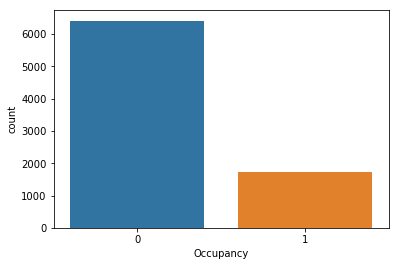

In [272]:
ss=sns.countplot(df_train.Occupancy)

In [273]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


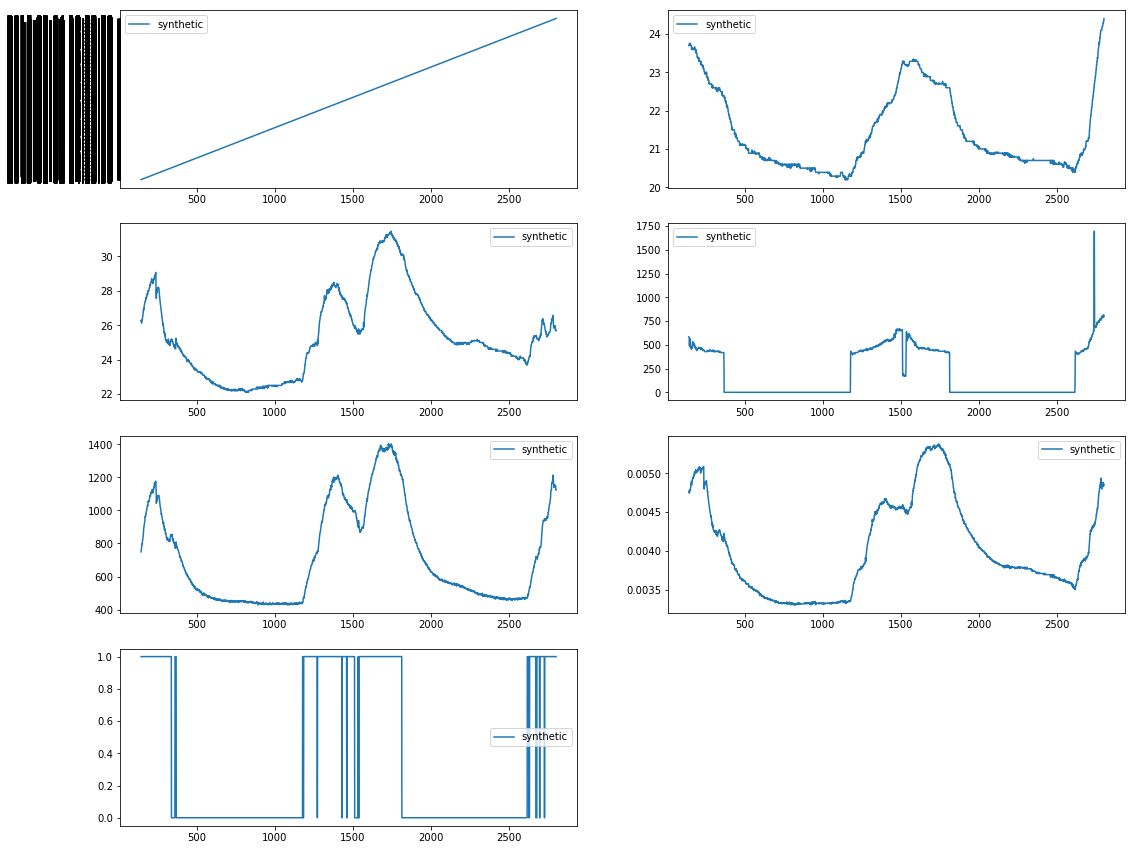

In [275]:
plt.figure(figsize=(18,15))
for i in range(0,7):
    plt.subplot(4,2,i+1)
    plt.plot(df_test.iloc[:,i], label="synthetic")
    plt.legend()

In [276]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train=df_train.iloc[:,1:6]
y_train=df_train.iloc[:,6]

X_test=df_test.iloc[:,1:6]
y_test=df_test.iloc[:,6]

# Scalling

In [277]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
#Scalling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

k=11....96.36---second best
k=7...96.47---best 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

In [278]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train,y_train)
y_predict=neigh.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_predict)

from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_predict)
print(cm_knn,acc_knn)

[[1646   47]
 [  47  925]] 0.9647279549718574


In [279]:
print("Accuracy:",accuracy_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("Recall:",recall_score(y_test,y_predict))
f1=fbeta_score(y_test,y_predict,beta=1)
print("F1:",f1)
print(classification_report(y_test,y_predict))

Accuracy: 0.9647279549718574
Precision: 0.9516460905349794
Recall: 0.9516460905349794
F1: 0.9516460905349794
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.95      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665



Text(69.0, 0.5, 'Actual values')

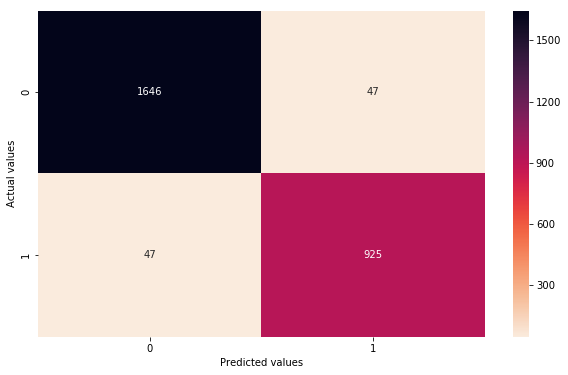

In [283]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_knn,fmt='g',cmap='rocket_r',annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
kNN--0.96473
SVC---
rbf=97.786 # converting to higher dimension and then applyig kerel
linear=91.744 # a line used to separate different classes
poly
deg_1=0.92195 # higher order of independent variables are projected and then making the sepearation plane
deg_2=0.7523
deg_3=0.8615

In [247]:
from sklearn.svm import SVC
svc=SVC(kernel="poly",degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

cm_svc = confusion_matrix(y_test, y_predict)
acc_svc=accuracy_score(y_test,y_predict)
print(cm_svc,acc_svc)

[[1685    8]
 [ 361  611]] 0.8615384615384616


In [248]:
print("accuracy",accuracy_score(y_test,y_predict))
print("Precision",precision_score(y_test,y_predict))
print("Recall",recall_score(y_test,y_predict))
f1=fbeta_score(y_test,y_predict,beta=1)
print("F1",f1)
print(classification_report(y_test,y_predict))

accuracy 0.8615384615384616
Precision 0.9870759289176091
Recall 0.6286008230452675
F1 0.7680703959773729
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1693
           1       0.99      0.63      0.77       972

    accuracy                           0.86      2665
   macro avg       0.91      0.81      0.83      2665
weighted avg       0.88      0.86      0.85      2665



Text(69.0, 0.5, 'Actual values')

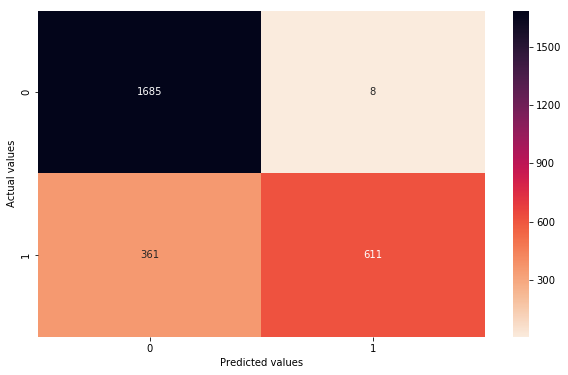

In [249]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_svc,fmt='g',cmap='rocket_r',annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

No. of support vectors

In [280]:
svc.n_support_

array([254, 252])

In [281]:
print(len(svc.support_vectors_))

506


In [284]:
svc.support_vectors_

array([[ 2.0464259 ,  0.33782972, -0.61372607,  0.20188813,  0.99561281],
       [ 0.0795752 , -0.59918358,  1.57376283, -0.46546455, -0.56750636],
       [ 0.0795752 , -0.5842673 ,  1.56178128, -0.44929113, -0.55283694],
       ...,
       [ 1.45637069,  2.18021573,  0.46204605,  3.76057216,  2.78298604],
       [-0.29084835,  1.35575251,  1.53781817, -0.47686549,  1.22366762],
       [-0.29084835,  1.36117661,  1.60970748, -0.456715  ,  1.22890482]])